
<p style = "font-size : 50px; color : #ff0000 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #696969; border-radius: 5px 5px;"><strong>🎥 Movie Genres Classification</strong></p> 



<img style="float: center;  border:5px solid #DC143C; width:75%" src = https://365psd.com/images/previews/60f/movie-genres-vector-icons-free-33970.jpg>

In [43]:
# Importing essential libraries
import numpy as np
import pandas as pd

<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Loading Data</strong></p>


In [44]:
# Loading the dataset
df = pd.read_csv("./archive/kaggle_movie_train.csv")


<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong> EDA</strong></p>

In [45]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [46]:
df.shape

(22579, 3)

In [47]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [48]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

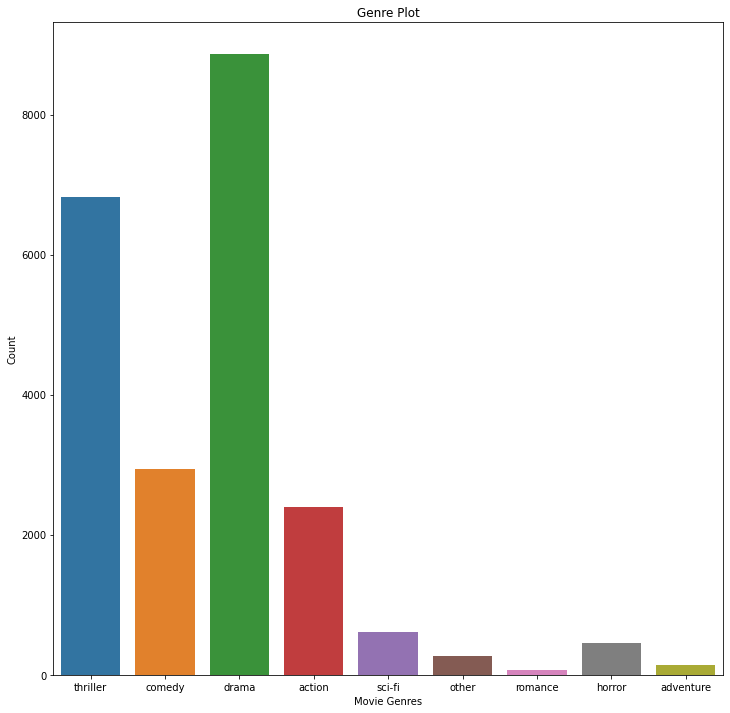

In [49]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()


<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong> Data Cleaning and Preprocessing</strong></p>

In [50]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [51]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [52]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [53]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [54]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kristina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
df.shape

(22579, 2)

In [14]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [56]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [57]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [58]:
len(corpus)

22579

In [59]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

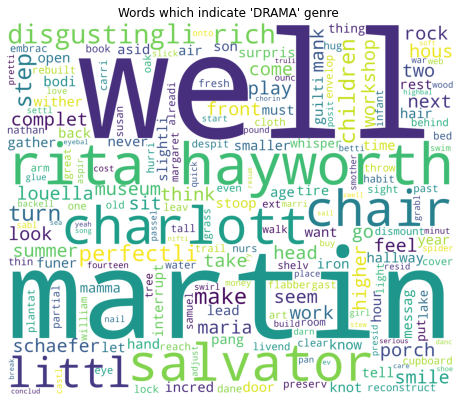

In [60]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

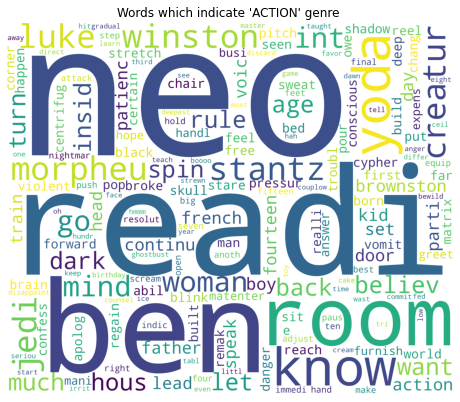

In [61]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

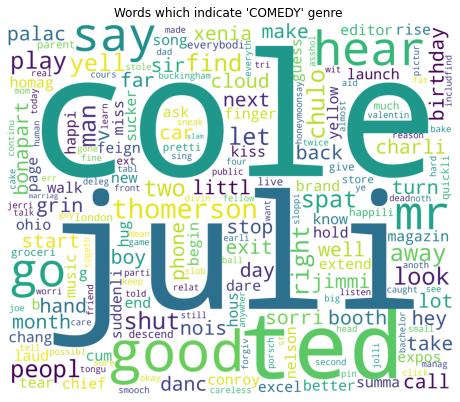

In [62]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [63]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [64]:
y = df['genre'].values


<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong> Model Building</strong></p>

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)



<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong> Multinomial Naive Bayes </strong></p> 


In [66]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [67]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [68]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [69]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [70]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]],
      dtype=int64)

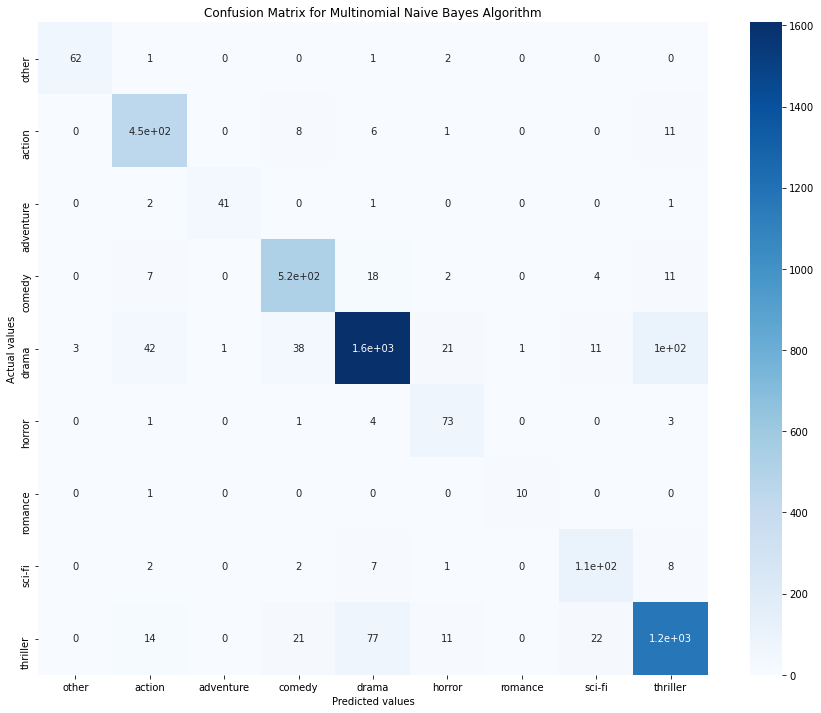

In [71]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [72]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [73]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)


<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong> Predictions</strong></p>

In [74]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [75]:
# For generating random integer
from random import randint

In [76]:
# Loading test dataset
test = pd.read_csv("./archive/kaggle_movie_test.csv")
test.columns

Index(['id', 'text'], dtype='object')

In [77]:
test.shape

(5589, 2)

In [78]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


![giphy.gif](https://media.giphy.com/media/DJqg6JzjuyziX948AC/giphy.gif)

In [79]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ost. Searching inside herself. Maybe she is crazy... MARROW There has to be Monster in the Labyrinth. We make them up. That's how we deal with the things in everyday life that are too terrible to deal with. Like losing someone. Like being alone. Marrow reaches down to Nell, but she shrinks away. Theo blocks Marrow out, shielding Nell. Marrow pauses, disgusted with himself. MARROW cont'd I'm sorry, Nell. I'm really, really sorry I did this to you. LUKE Sometimes saying you're sorry is just not enough. A disgusted Luke leaves the room. INT. NELL'S ROOM NIGHT Nell lies in her bed, shivering. NELL Don't leave me. Theo spreads an extra blanket over Nell. THEO I'm going to stay with you until you fall asleep. And then I'm going to get some brandy. NELL I don't think I want any. THEO I do. Theo spots a small candelabra with strings of crystal beads on the bedside table. She lights the two candles. Theo goes and turns out the light. Nell lies there watching the flicker of the candles p

![giphy.gif](https://media.giphy.com/media/eRRPUbWZch3i/giphy.gif)

In [80]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ully furnished. Paula is unpacking Marian's things. Marian stands in the middle of the apartment, feeling relaxed, if still a bit shaken, for the first time since she arrived. PAULA So, what do you think? MARIAN Well, once you're inside, it's nice. PAULA You don't like where I live? Marian walks over to the window and peers out. MARIAN Well, when I walked up the block, I ... well, my word! PAULA That's New York. It looks rundown, but it's safe during the day. You'll get used to it. Marian returns her gaze to the view out the window. EXT. STREET TWILIGHT MARIAN'S P.O.V. Out the window. Two BIKERS stand with their arms crisscrossed against their leather vested chests, framing the burning drum on the sidewalk, guarding the phalanx of Harleys. CUT TO INT. CO OP NIGHT LATER Paula and Marian are sitting at the dining table. They're studying one of those plastic laminated maps of New York that you can buy everywhere. Paula is attempting to acquaint her mother with Manhattan's complex 

![giphy.gif](https://media.giphy.com/media/MCLLxWrS8Iplrovb6u/giphy.gif)

In [81]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  be halted, and faced towards the new guard, and will present arms. Then it will march off behind its band, while the kiltie guard is called to attention and presents arms. The outgoing and incoming officers of the day will salute each other. As the old guard marches off, their band will stop playing, and the pipers will march and start playing the bagpipes. This will continue while the new guard is inspected. The new guard will be marched will be marched off behind the pipes, and the ceremony is over. This is the background of the following scenes, and is going on all the time. Whatever portion of it is to be shown in immaterial, but the sound of it will be heard always, louder, not so loud, not loud at all, according to what is going on and how far off the bands are. Betty is staring through the railing as the drum and bugle band goes into its tattoo and starts marching. A moment later, the bugles join in. CUT TO CLOSE UP OF HANDLEY He is looking off in the other direction, m

![giphy.gif](https://media.giphy.com/media/hkUs4wIEozErFhDTiN/giphy.gif)

In [82]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script:  that might jeopardize your chances for permanent appointment to the curatorship. DR. FELL Only if you told. Fell smiles again Remind me. What was his crime? PAZZI He was accused of killing Giuliano de'Medici. DR. FELL Unjustly? PAZZI No, I don't think so. DR. FELL Then he wasn't just accused. He did it. He was guilty. A knowing look from Fell makes Pazzi wonder if he somehow knows he knows he's Lecter. DR. FELL I'd think that would make living in Florence with the name Pazzi uncomfortable, even 500 years later. PAZZI Not really. In fact, I can't remember the last time before today someone brought it up. DR. FELL But people don't always tell you what they're thinking... They just see to it you don't advance. then I'm sorry, I too often say what I'm thinking. I'll be right back to help you. Fell leaves Pazzi alone in the room... FELL'S VOICE Any developments in the Il Mostro case? PAZZI I believe my colleagues are checking suspects' homes to see if they have any Botticelli print

![giphy.gif](https://media.giphy.com/media/hkUs4wIEozErFhDTiN/giphy.gif)

In [83]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: d on Flatbed. The hatch is already sealed. He grapples with Geek MIRV, trying to free it from the steel claw. INT. FLATBED 172 Coffey crawls along the access tunnel to the pilot's compartment. He claws his way into the control seat and starts rapidly flipping switches. INT. CORRIDOR 173 Catfish pounds down the corridor like he's never run before, his beer gut doing a rumba. He reaches the door, tears out the piece of pipe and spins the wheel. Hippy pushes it open so fast it hits Catfish in the stomach. Hippy tears past him, running with the assault rifle. John Wayne. INT. SUB BAY 174 Flatbed is submerging, with only the hatch tower still above the water. Bud is being dragged down, still trying to free the ROV. He gives up when he sees Hippy run in, waving the assault rifle around like a 130 pound Rambo. Bud climbs the hatch tower and leaps to the deck of the moonpool. Hippy clumsily raises the unfamiliar rifle at Coffey, visible inside his viewing bubble beneath the swirling wa

![giphy.gif](https://media.giphy.com/media/hkUs4wIEozErFhDTiN/giphy.gif)